In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [27]:
N = 10000

# theta - параметр тета
# scale - размер
def showGraphs(theta, scale, e1, e2, e3, e4, e5):
    sample = sts.uniform(0, theta).rvs(N)
    
    x = np.arange(1, N + 1)
    y1 = np.zeros(N)  # 2X
    y2 = np.zeros(N)  # X + X(n)/2
    y3 = np.zeros(N)  # (n + 1) * X(1)
    y4 = np.zeros(N)  # X(1) + X(n)
    y5 = np.zeros(N)  # ((n + 1)/n) * X(n)
    
    for n in range(1, N):
        samplePart = sample[:n]
        y1[n] = abs(theta - (samplePart.mean() * 2.0))
        y2[n] = abs(theta - (samplePart.mean() + samplePart.max() * 0.5))
        y3[n] = abs(theta - ((n + 1) * samplePart.min()))
        y4[n] = abs(theta - (sample.min() + sample.max()))
        y5[n] = abs(theta - ((n + 1) / n * sample.max()))
   
    plt.figure(figsize=(9, 5))
    if (e1):
        plt.plot(x, y1, label='$2\overline{X}$')
    if (e2):
        plt.plot(x, y2, label='$\overline{X} + X_{(n)}/2$')
    if (e3):
        plt.plot(x, y3, label='$(n + 1)X_{(1)}$')
    if (e4):
        plt.plot(x, y4, label='$X_{(1)} + X_{(n)}$')
    if (e5):
        plt.plot(x, y5, label='$\\frac{n + 1}{n}X_{(n)}$')
    plt.legend()
    plt.ylim((0, scale))
    plt.xlabel('n')
    plt.ylabel('$|\\theta - estimation|$')
    plt.title('$\\theta=' + str(theta) + '$')
    plt.show()
    print("Delta for n = N:")
    print(y1[-1], y2[-1], y3[-1], y4[-1], y5[-1])

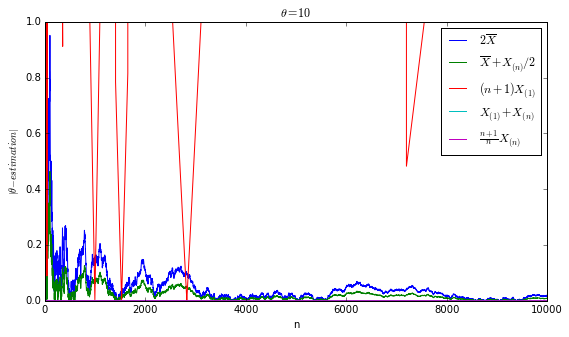

Delta for n = N:
(0.020156206314126734, 0.0098635563303801632, 1.4698250415456826, 0.00042392384247946779, 0.00042909365336640803)


In [28]:
showGraphs(10, 1, True, True, True, True, True)

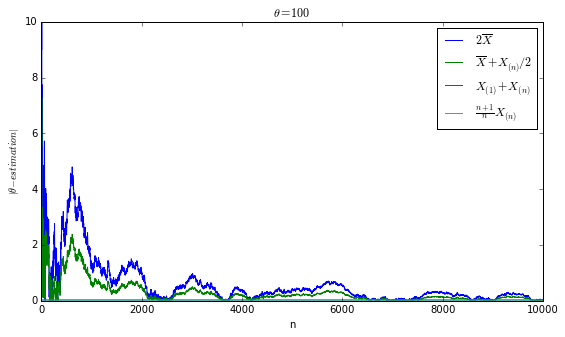

Delta for n = N:
(0.018410282563877445, 0.002436509444109447, 440.51633580454177, 0.030768332128360498, 0.023283301452096339)


In [29]:
showGraphs(100, 10, True, True, False, True, True)

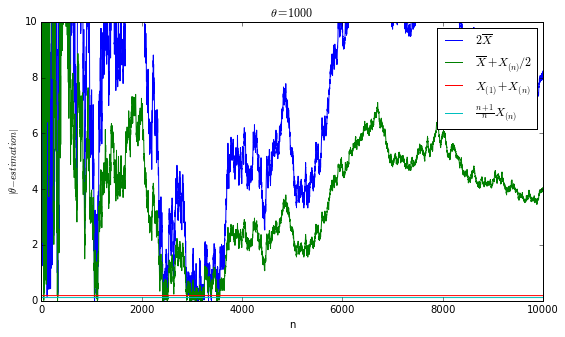

Delta for n = N:
(8.1316884849995859, 4.0078415888544896, 2024.2958379989027, 0.18642427650922855, 0.11600530729060665)


In [30]:
showGraphs(1000, 10, True, True, False, True, True)

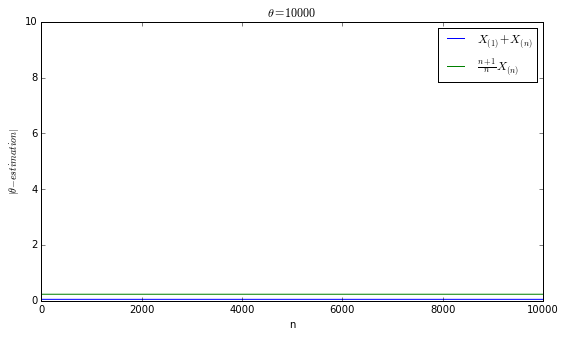

Delta for n = N:
(47.928967761938111, 24.081910531687754, 8176.3784376642689, 0.052491145201202016, 0.23485330143557803)


In [31]:
showGraphs(10000, 10, False, False, False, True, True)

Лучшие оценки - $X_{(1)} + X_{(n)}, \frac{n + 1}{n}X_{(n)}$